In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio 
import plotly.colors
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

from datetime import datetime

In [2]:
df = pd.read_excel(r'E:\C.TSUBASA\DATA SCIENCE\MY PROJECT\ML\21(PORTFOLIO)\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
'''Calculating RFM values'''

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Recency'] = (datetime.now().date() - df['InvoiceDate'].dt.date)

# calculate Frequency
Frequency_data = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
Frequency_data.rename(columns={'InvoiceNo' : 'Frequency'}, inplace=True)
df = df.merge(Frequency_data, on='CustomerID', how='left')

# Cal Monetary Value
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
Monetary_data = df.groupby('CustomerID')['TotalSum'].sum().reset_index()
Monetary_data.rename(columns={'TotalSum': 'MonetaryValue'}, inplace=True)
df = df.merge(Monetary_data, on='CustomerID', how='left')

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,TotalSum,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4782 days,312,15.30,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4782 days,312,20.34,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4782 days,312,22.00,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4782 days,312,20.34,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4782 days,312,20.34,5288.63


In [11]:
'''Calculating RFM score'''
Recency_scores = [5,4,3,2,1]
Frequency_scores = [1,2,3,4,5]
Monetary_scores = [1,2,3,4,5]

df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=Recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=Frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=Monetary_scores)

df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   InvoiceNo       406829 non-null  object         
 1   StockCode       406829 non-null  object         
 2   Description     406829 non-null  object         
 3   Quantity        406829 non-null  int64          
 4   InvoiceDate     406829 non-null  datetime64[ns] 
 5   UnitPrice       406829 non-null  float64        
 6   CustomerID      406829 non-null  float64        
 7   Country         406829 non-null  object         
 8   Recency         406829 non-null  timedelta64[ns]
 9   Frequency       406829 non-null  int64          
 10  TotalSum        406829 non-null  float64        
 11  MonetaryValue   406829 non-null  float64        
 12  RecencyScore    406829 non-null  int32          
 13  FrequencyScore  406829 non-null  int32          
 14  MonetaryScore   4068

In [13]:
'''RFM value Segmentation'''
#
df['RFM_Score'] = df[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis=1)

# Create RFM segment based on RFM score
segment_labels = ['Low_Value', 'Mid_Value','High_Value']
df['Value_Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

In [14]:
segment_counts = df['Value_Segment'].value_counts().reset_index()
segment_counts.columns = ['Value_Segment', 'Count']

pastel_color = px.colors.qualitative.Pastel
fig_segment_dist = px.bar(segment_counts, x='Value_Segment', y='Count',color='Value_Segment',
                          color_discrete_sequence=pastel_color, title= 'RFM Value Segment Distribution')

fig_segment_dist.update_layout(xaxis_title = "RFM Value Segment",
                               yaxis_title = 'Count',
                               showlegend =False)
fig_segment_dist.show()

**RFM Customer Segment**

In [17]:
'''Create RFM Customer segments'''
df['RFM_Customer_Segments'] = ''

df.loc[df['RFM_Score'] >= 9,'RFM_Customer_Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9) ,'RFM_Customer_Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6),'RFM_Customer_Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >=4) & (df['RFM_Score'] < 5),'RFM_Customer_Segments'] = 'Cant Lose'
df.loc[(df['RFM_Score'] >=3) & (df['RFM_Score'] < 4), 'RFM_Customer_Segments'] = 'Lost'

In [18]:
print(df[['CustomerID','RFM_Customer_Segments']])

        CustomerID RFM_Customer_Segments
0          17850.0                  Lost
1          17850.0                  Lost
2          17850.0                  Lost
3          17850.0                  Lost
4          17850.0                  Lost
...            ...                   ...
406824     12680.0   Potential Loyalists
406825     12680.0   Potential Loyalists
406826     12680.0   Potential Loyalists
406827     12680.0   Potential Loyalists
406828     12680.0   Potential Loyalists

[406829 rows x 2 columns]


In [20]:
# analysis ditribution of customers across different RFM Customer segments

segment_product_counts = df.groupby(['Value_Segment', 'RFM_Customer_Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)
fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path= ['Value_Segment', 'RFM_Customer_Segments'],
                                         values = 'Count',
                                         color = 'Value_Segment', color_discrete_sequence= px.colors.qualitative.Pastel,
                                         title = 'RFM Customer Segments by Value'
                                         )

fig_treemap_segment_product.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   InvoiceNo              406829 non-null  object         
 1   StockCode              406829 non-null  object         
 2   Description            406829 non-null  object         
 3   Quantity               406829 non-null  int64          
 4   InvoiceDate            406829 non-null  datetime64[ns] 
 5   UnitPrice              406829 non-null  float64        
 6   CustomerID             406829 non-null  float64        
 7   Country                406829 non-null  object         
 8   Recency                406829 non-null  timedelta64[ns]
 9   Frequency              406829 non-null  int64          
 10  TotalSum               406829 non-null  float64        
 11  MonetaryValue          406829 non-null  float64        
 12  RecencyScore           406829 

In [26]:
# Now  lets the ditribution of RFM values within the Champion segment
Champion_segment = df[df['RFM_Customer_Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=Champion_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=Champion_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=Champion_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Ditribution of RFM values within the Champion segment',
                  yaxis_title = 'RFM Value',
                  showlegend=True)
fig.show()

In [27]:
corr_matrix = Champion_segment[['RecencyScore', 'FrequencyScore','MonetaryScore']].corr()

fig_heatmap = px.imshow(corr_matrix, color_continuous_scale='RdBu')
fig_heatmap.update_layout(title='Correlation Matrix of RFM values within Champion segment')
fig_heatmap.show()

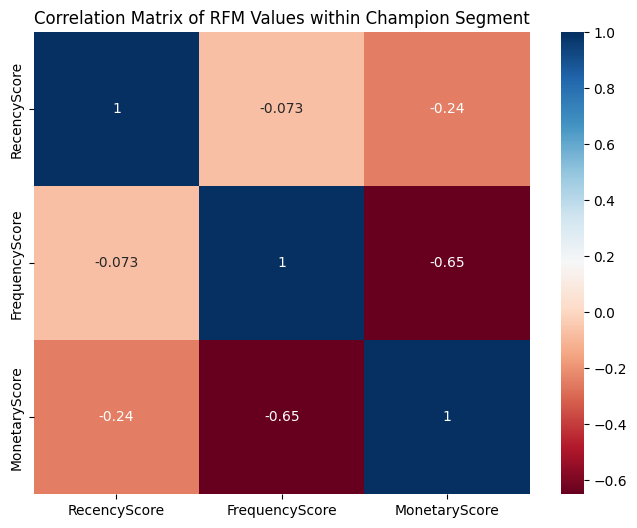

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot =True, cmap='RdBu', cbar=True)
plt.title('Correlation Matrix of RFM Values within Champion Segment');

In [39]:
# now lets have a look at the number of customers in all the segments
pastel_color = plotly.colors.qualitative.Pastel
segment_counts = df['RFM_Customer_Segments'].value_counts()

fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values, marker=dict(color=pastel_color))])
#fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
#                            marker=dict(color=pastel_color))])

champion_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champion_color if segment == 'Champion' else pastel_color[i] for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title = 'RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [45]:
# Now lets take a look at RFM scores of all the segments

segment_scores = df.groupby("RFM_Customer_Segments")['RecencyScore', 'FrequencyScore','MonetaryScore'].mean().reset_index()
fig = go.Figure()

fig.add_trace(go.Bar(x= segment_scores['RFM_Customer_Segments'], y=segment_scores['RecencyScore'], name ='Recency Score', marker_color='rgb(158, 202, 225)'))
fig.add_trace(go.Bar(x= segment_scores['RFM_Customer_Segments'], y=segment_scores['FrequencyScore'], name ='Frequency Score', marker_color='rgb(94, 158, 217)'))
fig.add_trace(go.Bar(x= segment_scores['RFM_Customer_Segments'], y=segment_scores['MonetaryScore'], name ='Monetary Score', marker_color='rgb(32, 102, 148)'))

fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency and Monetary',
    xaxis_title='RFM Segments',
    yaxis_title = 'Score',
    barmode='group',
    showlegend=True
)
fig.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14132\2826459174.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

